<a href="https://colab.research.google.com/github/vidhya2324/Machine_learning_starting_project/blob/main/Gold_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

#Data collection

In [3]:
!kaggle datasets download -d altruistdelhite04/gold-price-data

Dataset URL: https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data
License(s): unknown
  0% 0.00/41.9k [00:00<?, ?B/s]
100% 41.9k/41.9k [00:00<00:00, 54.8MB/s]


In [4]:
!unzip \*.zip && rm *.zip

Archive:  gold-price-data.zip
  inflating: gld_price_data.csv      


In [5]:
Gold_data=pd.read_csv("/content/gld_price_data.csv")

In [6]:
Gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
Gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
Gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
Gold_data.shape

(2290, 6)

In [10]:
Gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


#spliting the training data

In [13]:
x=Gold_data.drop(['Date','GLD'],axis=1)
y=Gold_data.GLD

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


#Model building

In [15]:
model=RandomForestRegressor()

In [16]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [37]:
from sklearn import metrics
train_data_prediction=model.predict(x_train)
error_score=metrics.r2_score(y_train,train_data_prediction)
print("r2_score ", error_score)

r2_score  0.9985300622891303


In [38]:
test_data_prediction=model.predict(x_test)
error_score=metrics.r2_score(y_test,test_data_prediction)
print("r2_score ", error_score)

r2_score  0.9906204299226898


Visualization

In [24]:
Gold_data.drop(['Date'],axis=1,inplace=True)

In [25]:
correlation=Gold_data.corr()

<Axes: >

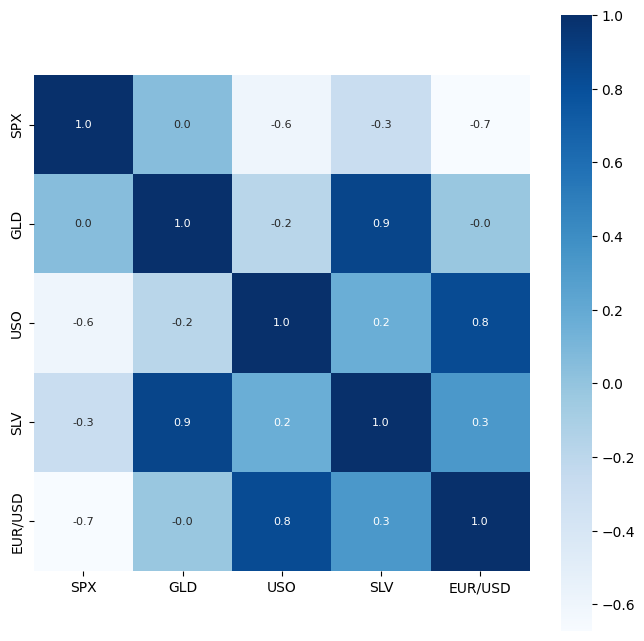

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [29]:
#correlation value for GLD
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


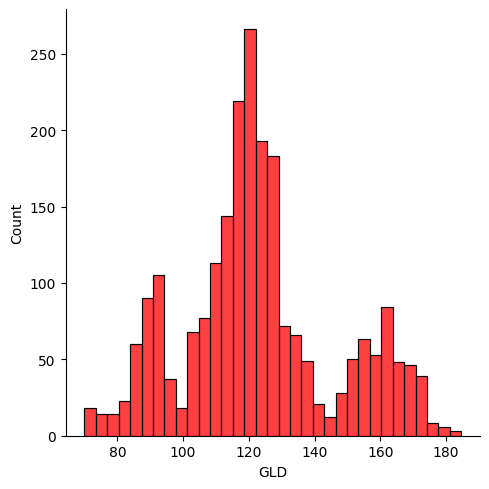

In [30]:
sns.displot(Gold_data['GLD'],color='red')

<ipython-input-35-2dbdfad1c249>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

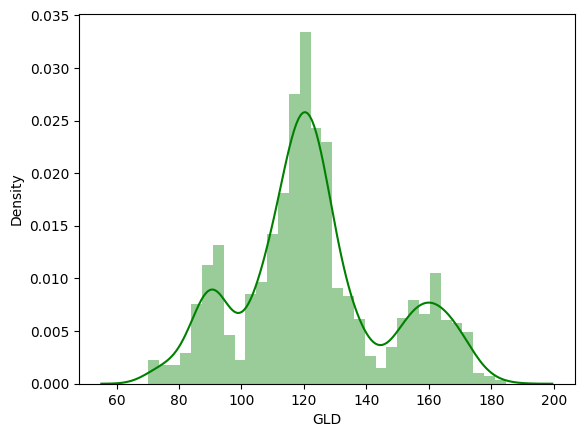

In [35]:
sns.distplot(Gold_data['GLD'],color='green')

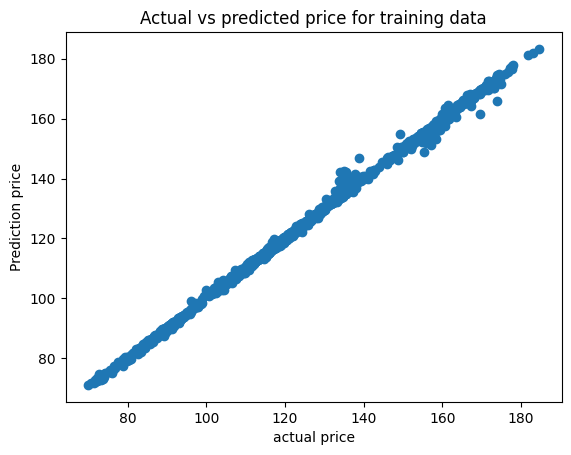

In [39]:
#plotting actual vs predicted price for training data
plt.scatter(y_train,train_data_prediction)
plt.xlabel("actual price")
plt.ylabel('Prediction price')
plt.title("Actual vs predicted price for training data")
plt.show()

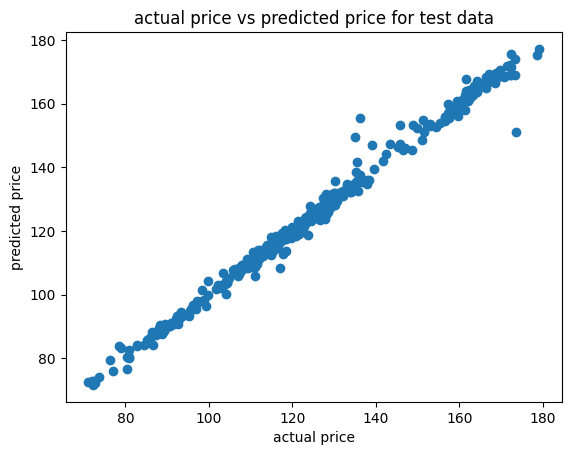

In [40]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual price vs predicted price for test data")
plt.show()

I think the is overfitted...but i am not sure about that...lets build another model by using linear regression....then compare both...

#2. Linear regression

In [41]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [44]:
test_data_prediction=model.predict(x_test)
error_score=metrics.r2_score(y_test,test_data_prediction)
print("mean square error ",error_score)

mean square error  0.8975640982991402


In [45]:
train_data_prediction=model.predict(x_train)
error_score=metrics.r2_score(y_train,train_data_prediction)
print("mean square error ",error_score)

mean square error  0.8771892526181604
